## Download NEON AOP Lidar and Hyperspectral Data using the API

This tutorial runs through downloading NEON AOP data using the API. We will not go into all the details of the API here, but for more information, please refer to the additional resources at the bottom of this notebook.

Learning Objectives:
- Become familiar with NEON AOP data products 
- Explore available NEON AOP data products in the data portal (https://data.neonscience.org/data-products/explore)
- Explore available NEON AOP data products by site and year using provided Python functions
- Download specific data products to use in the remainder of this workshop

First, the tables below list the selected NEON AOP lidar and hyperspectral data products, along with the file extensions that you will need when downloading a specific file, and the corresponding data product numbers. When working with any AOP data product, we recommend reading the ATBD (Algorithm Theoretical Basis Document) for details about the algorithm and implementation used to generate the data. AOP files typically follow this standard naming convention:

NEON_DOM_SITE_DP0_UTMXXX_UTMYYYY_ProductName.ext

For example:

| Data Product                     | Example File Name                                 |
|----------------------------------|---------------------------------------------------|
| Lidar Digital Terrain Model      | NEON_D05_CHEQ_DP3_722000_5072000_DTM.tif          |
| Hyperspectral Vegetation Indices | NEON_D05_CHEQ_DP3_722000_5080000_VegIndices.zip   |

Note that the year the data collected is not included in the file name, so if you are working with data spanning multiple years, you will need to be careful about keeping track of the year in your workflow.

### Lidar Data Products
| Product Name                       | Extension             | Product Number               | ATBD Doc Number(s)                   |
|------------------------------------|-----------------------|------------------------------|-----------------------------------|
| LiDAR Slant Range Waveform         | .plz, .wvz            | DP1.30001.001  | NEON.DOC.001293                   |
| Discrete Return LiDAR Point Cloud  | .laz                  | DP1.30003.001  | NEON.DOC.001292,001288  |
| Ecosystem Structure                | CHM.tif               | DP3.30015.001  | NEON.DOC.002387                   |
| Elevation - LiDAR                  | DTM.tif, DSM.tif      | DP3.30024.001  | NEON.DOC.002390                   |
| Slope and Aspect - LiDAR           | slope.tif, aspect.tif | DP3.30025.001  | NEON.DOC.003791                   |

### Selected Spectrometer Data Products
| Product Name                       | Extension             | Product Number               | ATBD Doc Number(s)                   |
|------------------------------------|-----------------------|------------------------------|-----------------------------------|
| Spectrometer Orthorectified Surface Directional Reflectance Mosaic  | reflectance.h5                      | DP3.30006.001  | NEON.DOC.001288,004365  |
| Albedo - Spectrometer                                               | albedo.tif               | DP3.30011.001  | NEON.DOC.004326         |
| LAI - Spectrometer                                                  | LAI.tif, LAI_error.tif   | DP3.30012.001  | NEON.DOC.002385         |
| fPAR - Spectrometer                                                 | fPAR.tif, fPAR_error.tif | DP3.30014.001  | NEON.DOC.003840         |
| Canopy Water Content                                                | WaterIndices.zip         | 30019.001      | NEON.DOC.004364         |
| Vegetation Indices - Spectrometer                                   | VegIndices.zip           | 30026.001      | NEON.DOC.002391         |

First let's import the required functions for downloading from the API. 

In [1]:
from neon_download_functions import *

To see a list of the functions (and modules) that we've pulled in we can use the magic command `%whos`:

In [2]:
%whos

Variable                      Type        Data/Info
---------------------------------------------------
DownloadFile                  function    <function DownloadFile at 0x7f50000e3d30>
download_aop_files            function    <function download_aop_files at 0x7f50000e3dc0>
download_urls                 function    <function download_urls at 0x7f50000e3ca0>
list_available_urls           function    <function list_available_urls at 0x7f5000458ee0>
list_available_urls_by_year   function    <function list_available_<...>y_year at 0x7f5000208040>
os                            module      <module 'os' from '/opt/c<...>nda/lib/python3.8/os.py'>
requests                      module      <module 'requests' from '<...>es/requests/__init__.py'>
urllib                        module      <module 'urllib' from '/o<...>n3.8/urllib/__init__.py'>


Next we'll specify the site of interest. Note that data may not be available for all sites and all years, so first we will make sure that there is data. We recommend first checking out the NEON data availability matrix at this website - https://data.neonscience.org/view-data-availability.

In [3]:
site = 'JORN'

Let's look at the available data for the Lidar Elevation data product, `DP3.30024.001`

In [4]:
list_available_urls('DP3.30024.001',site)

['https://data.neonscience.org/api/v0/data/DP3.30024.001/JORN/2017-08',
 'https://data.neonscience.org/api/v0/data/DP3.30024.001/JORN/2018-08',
 'https://data.neonscience.org/api/v0/data/DP3.30024.001/JORN/2019-08']

Next let's specify the year of interest, for now let's use the latest year available (2019):

In [5]:
year = '2019'

Now that we know there is data for the site and year specified, we can use the `download_aop_files` function to download the data. We can get more information about this function using a ? as follows:

In [6]:
download_aop_files?

Signature:
download_aop_files(
    data_product_id,
    site,
    year=None,
    download_folder='./data',
    match_string=None,
)
Docstring:
download_aop_files downloads NEON AOP files from the AOP for a given data product, site, and 
optional year, download folder, and 
--------
 Inputs:
     required:
         data_product_id: the data product code (eg. 'DP3.30015.001' - CHM)
         site: the 4-digit NEON site code (eg. 'SRER', 'JORN')
     
     optional:
         year: year (eg. '2020'); default (None) is all years
         download_folder: folder to store downloaded files; default (./data) in current directory
         match_string: subset of data to match, need to use exact pattern for file name
--------
Usage:
--------
download_aop_files('DP3.30015.001','JORN','2019','../../data/JORN_2019/CHM','314000_3610000_DTM.tif')
File:      ~/NEON_workshop/tutorials/ipynb/neon_download_functions.py
Type:      function


Now that we know what inputs this function is expecting, we can run it. To start, let's pull in a single tile (by specifying the UTM x,y coordinates and data product type in the "match_string" field. For this to work you have to know that the UTM coordinates are in the bounds of the site. We will not go into this in detail here, but to preview a site, encourage you to explore the NEON data here ___. 

In [7]:
download_aop_files('DP3.30024.001',site,year,'../../data/2019_JORN/DTM','324000_3620000_DTM.tif')

['https://data.neonscience.org/api/v0/data/DP3.30024.001/JORN/2019-08']
downloading NEON_D14_JORN_DP3_324000_3620000_DTM.tif to ../../data/2019_JORN/DTM


Note that you can use standard Linux functions (such as `ls`) in Jupyter. Let's use ls to confirm that the data was downloaded in the expected location:

In [8]:
ls ../../data/2019_JORN/DTM

NEON_D14_JORN_DP3_314000_3610000_DTM.tif
NEON_D14_JORN_DP3_323000_3620000_DTM.tif
NEON_D14_JORN_DP3_324000_3620000_DTM.tif


Now let's use the same function but swap out the data product id with `DP3.30006.001` to download the corresponding hyperspectral surface reflectance tile. We'll also change the download folder to /Refl. For one tile this probably isn't necessary, but when you download all tiles for a given site it becomes more important to maintain an organized folder structure. Lastly, we need to change the last input to include the appropriate match string

In [9]:
download_aop_files('DP3.30006.001',site,year,'../../data/2019_JORN/Refl','324000_3620000_reflectance.h5')

['https://data.neonscience.org/api/v0/data/DP3.30006.001/JORN/2019-08']
downloading NEON_D14_JORN_DP3_324000_3620000_reflectance.h5 to ../../data/2019_JORN/Refl


In [10]:
ls -l ../../data/2019_JORN/Refl

total 1316424
-rw-r--r-- 1 jovyan jovyan  35265675 Nov  2 17:30 NEON_D14_JORN_DP3_314000_3620000_reflectance.h5
-rw-r--r-- 1 jovyan jovyan 651625826 Nov  2 23:14 NEON_D14_JORN_DP3_323000_3620000_reflectance.h5
-rw-r--r-- 1 jovyan jovyan 661121639 Nov  3 03:13 NEON_D14_JORN_DP3_324000_3620000_reflectance.h5


Finally, let's download the corresponding Vegetation Indices folder, which contains useful 

## On your own:

Try downloading an AOP data product of interest for a different site and year of your choice. 

*HINT*: If you don't have a site in mind, first explore the NEON data products web page to see what site and years are available and visualize the camera or veg indices. https://data.neonscience.org/data-products/explore

## Bonus:
### AOP Data Exploration using `geopandas`

If time allows at the end of the workshop, run through the steps below to plot a sites boundary shapefiles. You can either download the individual shapefiles for each tile by using the extension `.shp` and `.shx` or only the merged tiles by using `merged_tiles.shp/shx` as shown below. This is useful if you are only interested in looking at specific tiles of a given site and don't want to download all of the data; or if only part of a site was flown for a given year, this can give you a quick look at the area covered. Note these metadata shapefiles may not be present for all sites and all years, but the AOP team is working towards making them available for all data products on the portal. 

In order to visualize these shapefiles, we can use the `geopandas` package, which we import at the start. Follow the steps below to plot the AOP flight boundaries for SRER and JORN in 2019.

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

### Example 1: JORN 2019

In [12]:
download_aop_files('DP3.30024.001',site,year,'../../data/2019_JORN/Shapefiles','merged_tiles.shp')
download_aop_files('DP3.30024.001',site,year,'../../data/2019_JORN/Shapefiles','merged_tiles.shx')

['https://data.neonscience.org/api/v0/data/DP3.30024.001/JORN/2019-08']
downloading 2019_JORN_3_merged_tiles.shp to ../../data/2019_JORN/Shapefiles
['https://data.neonscience.org/api/v0/data/DP3.30024.001/JORN/2019-08']
downloading 2019_JORN_3_merged_tiles.shx to ../../data/2019_JORN/Shapefiles


Now we'll use the geopandas `read_file` and `plot` functions to display the merged shapefile:

Text(0.5, 1.0, 'AOP Coverage of JORN in 2019')

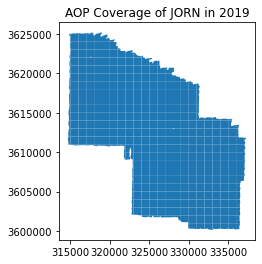

In [13]:
gdf = gpd.read_file('../../data/2019_JORN/Shapefiles/2019_JORN_3_merged_tiles.shp')
gdf.plot();
ax = plt.gca(); ax.ticklabel_format(style='plain') 
ax.set_title('AOP Coverage of JORN in 2019')

### Example 2: SRER 2019

In [ ]:
download_aop_files('DP3.30024.001','SRER','2019','../../data/2019_SRER/Shapefiles','merged_tiles.shp')
download_aop_files('DP3.30024.001','SRER','2019','../../data/2019_SRER/Shapefiles','merged_tiles.shx')

Text(0.5, 1.0, 'AOP Coverage of SRER in 2019')

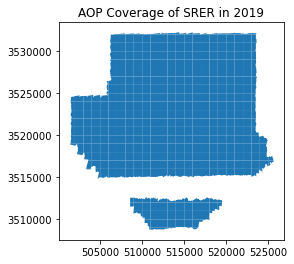

In [14]:
gdf = gpd.read_file('../../data/2019_SRER/Shapefiles/2019_SRER_3_merged_tiles.shp')
gdf.plot(); ax = plt.gca(); ax.ticklabel_format(style='plain')
ax.set_title('AOP Coverage of SRER in 2019')

## Additional Resources to NEON API

- https://data.neonscience.org/data-api/ (Basic information on the NEON API, including FAQs)
- https://github.com/neonscience/neon-data-api (GitHub repository for the NEON API)
- https://github.com/NEONScience/NEON-Data-Skills/tree/master/tutorials/Python/neon-api-python (tutorial explaining how to access the NEON API in Python)